In [2]:
from Code.Model.JS_Model import *
from Code.Load import Loaded_Data_v2 as ld
import pandas as pd

Importing plotly failed. Interactive plots will not work.


### Load Data

In [3]:
data = ld.regional_grouped_data
data = data.set_index(['region', 'date'])
data

w_new construction sales count  \
region  date                                         
Midwest 2018-03-31                    12082.313315   
        2018-04-30                    13163.086629   
        2018-05-31                    14303.497230   
        2018-06-30                    14972.297595   
        2018-07-31                    15543.400245   
...                                            ...   
West    2022-08-31                    11208.192986   
        2022-09-30                    11360.191915   
        2022-10-31                    11108.923026   
        2022-11-30                    10445.967318   
        2022-12-31                     9466.431988   

                    w_new construction mean sales price ($)  \
region  date                                                  
Midwest 2018-03-31                             4.064101e+05   
        2018-04-30                             4.605180e+05   
        2018-05-31                             4.708800e+05   
        2018-06-30                             4.494060e+05   
        2018-07-31                             4.417524e+05   
...                                                     ...   
West    2022-08-31                             1.339130e+06   
        2022-09-30                             1.326951e+06   
        2022-10-31                             1.340645e+06   
        2022-11-30                             1.257429e+06   
        2022-12-31                             1.195999e+06   

                    w_mean price cut ($)  w_mean days to pending  \
region  date                                                       
Midwest 2018-03-31          10538.410409               52.052799   
        2018-04-30          10953.848964               46.659460   
        2018-05-31          11251.988743               41.784847   
        2018-06-30          11314.173614               39.344523   
        2018-07-31          11156.103439               39.189459   
...                                  ...                     ...   
West    2022-08-31          39243.904002               26.274381   
        2022-09-30          36886.907615               31.836967   
        2022-10-31          36423.384805               36.651533   
        2022-11-30          36331.386946               40.871661   
        2022-12-31          35098.487348               46.514822   

                    w_mean price cut (%)  w_median sales price ($)  \
region  date                                                         
Midwest 2018-03-31              0.036359             169720.672511   
        2018-04-30              0.035415             174924.090647   
        2018-05-31              0.034718             180567.276454   
        2018-06-30              0.034203             186045.884185   
        2018-07-31              0.034224             188284.757964   
...                                  ...                       ...   
West    2022-08-31              0.037712             681054.710026   
        2022-09-30              0.036386             667081.443379   
        2022-10-31              0.035881             659426.795421   
        2022-11-30              0.035924             650854.904059   
        2022-12-31              0.035679             637649.322604   

                    w_mean sales price ($)  w_percent sold above list (%)  \
region  date                                                                
Midwest 2018-03-31           214909.413629                       0.193328   
        2018-04-30           216956.793549                       0.223797   
        2018-05-31           221728.396186                       0.256569   
        2018-06-30           228385.708537                       0.277426   
        2018-07-31           230886.550933                       0.279945   
...                                    ...                            ...   
West    2022-08-31           853524.899987                       0.475217   
        

### Stationarity

In [4]:
run_stationarity_tests(data)

ADF Test Assumptions: The null hypothesis is that the time series is non-stationary or has a unit root.
KPSS Test Assumptions: The null hypothesis is that the time series is stationary around a trend or constant (depending on the specified regression).
Non-stationary Variables: ['w_new construction sales count', 'w_new construction mean sales price ($)', 'w_mean price cut ($)', 'w_mean days to pending', 'w_mean price cut (%)', 'w_median sales price ($)', 'w_mean sales price ($)', 'w_zillow home value index', 'w_zillow observed rent index', 'Population', 'w_PCPI']


,Variable,ADF Test Statistic,ADF p-value,KPSS Test Statistic,KPSS p-value,Stationarity Assumption
0,w_new construction sales count,-1.838341,0.361599,0.296329,0.010000,Non-stationary
1,w_new construction mean sales price ($),-1.452238,0.556992,0.270422,0.010000,Non-stationary
2,w_mean price cut ($),-2.201821,0.205585,0.213785,0.010831,Non-stationary
3,w_mean days to pending,-4.721680,0.000077,0.169817,0.030152,Non-stationary
4,w_mean price cut (%),-2.707680,0.072719,0.133338,0.073448,Non-stationary
5,w_median sales price ($),-0.584519,0.874442,0.278926,0.010000,Non-stationary
6,w_mean sales price ($),-0.523122,0.887425,0.263275,0.010000,Non-stationary
7,w_percent sold above list (%),-4.535436,0.000170,0.100782,0.100000,Stationary
8,w_zillow home value index,-0.474575,0.896883,0.256536,0.010000,Non-stationary
9,w_zillow observed rent index,-2.049339,0.265367,0.191845,0.019058,Non-stationary


In [5]:
transformed_data = data.copy()
transformed_data['w_new construction mean sales price ($)'] = transformed_data['w_new construction mean sales price ($)'].diff()
transformed_data['w_new construction sales count'] = transformed_data['w_new construction sales count'].pct_change()
transformed_data['w_mean price cut ($)'] = transformed_data['w_mean price cut ($)'].pct_change()
transformed_data['w_mean days to pending'] = transformed_data['w_mean days to pending'].diff()
transformed_data['w_mean price cut (%)'] = transformed_data['w_mean price cut (%)'].diff()
transformed_data['w_median sales price ($)'] = transformed_data['w_median sales price ($)'].diff()
transformed_data['w_mean sales price ($)'] = transformed_data['w_mean sales price ($)'].diff()
transformed_data['w_zillow home value index'] = transformed_data['w_zillow home value index'].diff()
transformed_data['w_zillow observed rent index'] = transformed_data['w_zillow observed rent index'].diff()
transformed_data['Population'] = transformed_data['Population'].pct_change()
transformed_data['w_PCPI'] = transformed_data['w_PCPI'].diff()
transformed_data = transformed_data.dropna()
run_stationarity_tests(transformed_data, KPSS_TREND=True)

ADF Test Assumptions: The null hypothesis is that the time series is non-stationary or has a unit root.
KPSS Test Assumptions: The null hypothesis is that the time series is stationary around a trend or constant (depending on the specified regression).
Non-stationary Variables: []


,Variable,ADF Test Statistic,ADF p-value,KPSS Test Statistic,KPSS p-value,Stationarity Assumption
0,w_new construction sales count,-14.767013,2.354064e-27,0.051884,0.1,Stationary
1,w_new construction mean sales price ($),-16.393387,2.680743e-29,0.066355,0.1,Stationary
2,w_mean price cut ($),-15.474135,2.606640e-28,0.033450,0.1,Stationary
3,w_mean days to pending,-2.993795,3.547798e-02,0.033839,0.1,Stationary
4,w_mean price cut (%),-7.961992,2.931820e-12,0.045461,0.1,Stationary
5,w_median sales price ($),-13.653717,1.568168e-25,0.069993,0.1,Stationary
6,w_mean sales price ($),-13.954164,4.643888e-26,0.071402,0.1,Stationary
7,w_percent sold above list (%),-4.495752,2.001447e-04,0.101365,0.1,Stationary
8,w_zillow home value index,-14.803793,2.080077e-27,0.092806,0.1,Stationary
9,w_zillow observed rent index,-14.972083,1.196043e-27,0.047222,0.1,Stationary


### Granger Causality

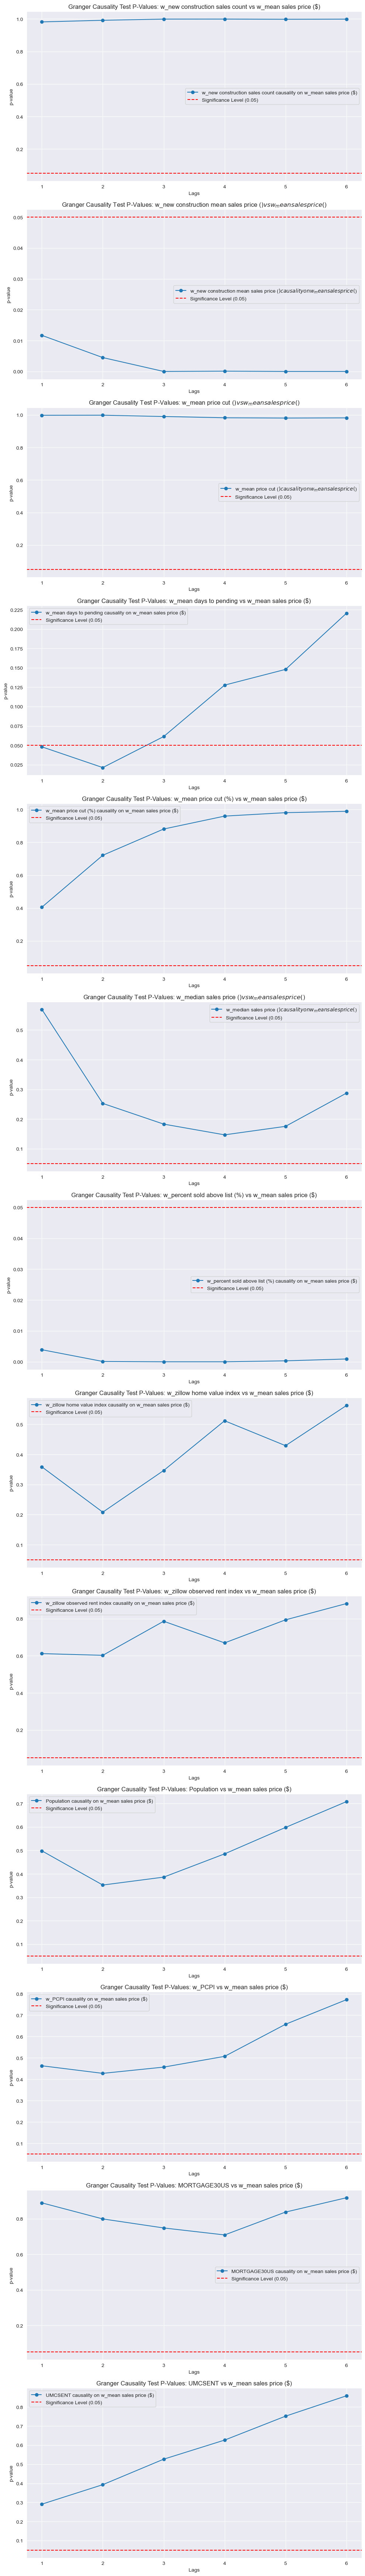

The null hypothesis for the Granger causality test is that coefficients on past values of a second time series are zero, indicating that the second time series does not cause the first one.


,Variable,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Interpretation
0,w_new construction sales count,0.9819,0.9919,0.9992,0.9993,0.9982,0.9990,Not significant: Does not influence target
1,w_new construction mean sales price ($),0.0117,0.0045,0.0000,0.0001,0.0000,0.0000,Significant: Influences target
2,w_mean price cut ($),0.9979,0.9984,0.9905,0.9826,0.9809,0.9820,Not significant: Does not influence target
3,w_mean days to pending,0.0480,0.0212,0.0613,0.1277,0.1480,0.2205,Significant: Influences target
4,w_mean price cut (%),0.4054,0.7211,0.8808,0.9593,0.9802,0.9884,Not significant: Does not influence target
5,w_median sales price ($),0.5693,0.2529,0.1832,0.1471,0.1757,0.2875,Not significant: Does not influence target
6,w_percent sold above list (%),0.0039,0.0001,0.0000,0.0000,0.0003,0.0009,Significant: Influences target
7,w_zillow home value index,0.3588,0.2083,0.3468,0.5119,0.4292,0.5626,Not significant: Does not influence target
8,w_zillow observed rent index,0.6117,0.6025,0.7861,0.6694,0.7936,0.8813,Not significant: Does not influence target
9,Population,0.4983,0.3524,0.3862,0.4854,0.5981,0.7082,Not significant: Does not influence target


In [6]:
results = compile_and_display_results(transformed_data, 'w_mean sales price ($)')
results

### Correlations

In [7]:
data.corr()

,w_new construction sales count,w_new construction mean sales price ($),w_mean price cut ($),w_mean days to pending,w_mean price cut (%),w_median sales price ($),w_mean sales price ($),w_percent sold above list (%),w_zillow home value index,w_zillow observed rent index,Population,w_PCPI,MORTGAGE30US,UMCSENT
w_new construction sales count,1.000000,0.178780,0.266008,0.606840,0.355508,0.027315,0.071414,-0.177357,0.146444,0.447764,-0.539273,0.430420,-0.041645,0.202534
w_new construction mean sales price ($),0.178780,1.000000,0.929615,-0.232360,0.122871,0.967785,0.972323,0.558475,0.982580,0.851659,-0.431334,0.774175,0.092251,-0.239885
w_mean price cut ($),0.266008,0.929615,1.000000,-0.242817,0.315921,0.910732,0.927332,0.641734,0.932615,0.881474,-0.375473,0.823963,0.088566,-0.313314
w_mean days to pending,0.606840,-0.232360,-0.242817,1.000000,-0.217839,-0.338257,-0.313671,-0.789890,-0.234992,-0.046712,-0.182819,-0.152009,-0.140521,0.580182
w_mean price cut (%),0.355508,0.122871,0.315921,-0.217839,1.000000,0.041299,0.074762,0.548734,0.097998,0.354294,-0.421139,0.574019,0.224612,-0.593001
w_median sales price ($),0.027315,0.967785,0.910732,-0.338257,0.041299,1.000000,0.998141,0.601503,0.988718,0.812293,-0.223877,0.716603,0.097641,-0.296855
w_mean sales price ($),0.071414,0.972323,0.927332,-0.313671,0.074762,0.998141,1.000000,0.599917,0.993095,0.837596,-0.242205,0.735648,0.102894,-0.293671
w_percent sold above list (%),-0.177357,0.558475,0.641734,-0.789890,0.548734,0.601503,0.599917,1.000000,0.552345,0.476656,-0.160739,0.618418,0.025222,-0.667832
w_zillow home value index,0.146444,0.982580,0.932615,-0.234992,0.097998,0.988718,0.993095,0.552345,1.000000,0.865238,-0.315173,0.767796,0.120668,-0.270335
w_zillow observed rent index,0.447764,0.851659,0.881474,-0.046712,0.354294,0.812293,0.837596,0.476656,0.865238,1.000000,-0.400009,0.834389,0.219771,-0.275672


In [8]:
transformed_data.loc[('Northeast',slice(None)), :].corr()

,w_new construction sales count,w_new construction mean sales price ($),w_mean price cut ($),w_mean days to pending,w_mean price cut (%),w_median sales price ($),w_mean sales price ($),w_percent sold above list (%),w_zillow home value index,w_zillow observed rent index,Population,w_PCPI,MORTGAGE30US,UMCSENT
w_new construction sales count,1.000000,0.534358,0.713208,0.569933,0.129850,0.871440,0.921081,-0.142607,0.989045,0.521579,-0.995134,-0.850738,0.063204,0.155693
w_new construction mean sales price ($),0.534358,1.000000,0.307230,0.180485,0.089119,0.486635,0.503273,-0.036314,0.527759,0.248281,-0.525400,-0.446817,-0.003974,0.042915
w_mean price cut ($),0.713208,0.307230,1.000000,0.362544,0.249131,0.577550,0.666919,-0.095088,0.719960,0.381977,-0.708459,-0.589200,0.059947,0.088638
w_mean days to pending,0.569933,0.180485,0.362544,1.000000,0.067867,0.290681,0.386776,-0.131001,0.584286,0.413826,-0.621016,-0.591035,0.205225,0.205951
w_mean price cut (%),0.129850,0.089119,0.249131,0.067867,1.000000,0.050577,0.138151,0.003625,0.199174,0.174281,-0.161859,-0.178803,-0.239295,0.002186
w_median sales price ($),0.871440,0.486635,0.577550,0.290681,0.050577,1.000000,0.968913,-0.019484,0.869453,0.479773,-0.847611,-0.714137,-0.101979,0.093004
w_mean sales price ($),0.921081,0.503273,0.666919,0.386776,0.138151,0.968913,1.000000,-0.049239,0.927567,0.491143,-0.906903,-0.788367,-0.110896,0.121840
w_percent sold above list (%),-0.142607,-0.036314,-0.095088,-0.131001,0.003625,-0.019484,-0.049239,1.000000,-0.094761,0.099279,0.123801,-0.071785,0.177660,-0.836761
w_zillow home value index,0.989045,0.527759,0.719960,0.584286,0.199174,0.869453,0.927567,-0.094761,1.000000,0.538627,-0.992753,-0.865081,0.012561,0.122108
w_zillow observed rent index,0.521579,0.248281,0.381977,0.413826,0.174281,0.479773,0.491143,0.099279,0.538627,1.000000,-0.530412,-0.489462,0.001598,0.080451


# Forecasts

### Split Data by Region

In [58]:
data_prophet = data.copy().reset_index()

data_prophet = data_prophet.rename(columns={'w_mean sales price ($)': 'y', 'date': 'ds'})
data_prophet['ds'] = pd.to_datetime(data_prophet['ds'])


south_data = data_prophet[data_prophet['region'] == 'South'].copy()
midwest_data = data_prophet[data_prophet['region'] == 'Midwest'].copy()
west_data = data_prophet[data_prophet['region'] == 'West'].copy()
northeast_data = data_prophet[data_prophet['region'] == 'Northeast'].copy()

south_data.drop(columns=['region'], inplace=True)
midwest_data.drop(columns=['region'], inplace=True)
west_data.drop(columns=['region'], inplace=True)
northeast_data.drop(columns=['region'], inplace=True)

train_south_data, test_south_data = temporal_train_test_split(south_data, test_size=0.2)
train_midwest_data, test_midwest_data = temporal_train_test_split(midwest_data, test_size=0.2)
train_west_data, test_west_data = temporal_train_test_split(west_data, test_size=0.2)
train_northeast_data, test_northeast_data = temporal_train_test_split(northeast_data, test_size=0.2)

def get_exog_columns(data):
    reserved_names = ['ds', 'y', 'cap', 'floor', 'y_scaled', 'cap_scaled']
    return [col for col in data.columns if col not in reserved_names]

exog_south_cols = get_exog_columns(south_data)
exog_midwest_cols = get_exog_columns(midwest_data)
exog_west_cols = get_exog_columns(west_data)
exog_northeast_cols = get_exog_columns(northeast_data)

### Multivariate Regression

In [50]:
reports = calculate_individual_regression_information(south_data['w_mean sales price ($)'], south_data.copy().drop(columns=['w_mean sales price ($)']).shift(1), 0, 1, intercept_bool=False)
reports[0].T

KeyError: 'w_mean sales price ($)'

In [11]:
reports[1]

,Mean Absolute Error (MAE),Average R-Squared
Model,0.0,0.999911


### Prophet

In [51]:
seasonality_params = {
    'yearly_seasonality': True,
    'quarterly_seasonality':True,
    'weekly_seasonality': False,
    'daily_seasonality': False,
    'seasonality_mode': 'additive' # or 'multiplicative'
}

In [60]:
best_south_model, best_south_forecast = optimize_prophet(train_south_data, test_south_data, exog=south_data[exog_south_cols], SPLIT_DATE=None)
best_south_forecast

16:17:15 - cmdstanpy - INFO - Chain [1] start processing
16:17:16 - cmdstanpy - INFO - Chain [1] done processing
16:17:16 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 34919.59237431647, MSE: 1468460261.10536, MAPE: 8.648706603994587, sMAPE: 8.231140010790332, MASE: 4.839675936578686


16:17:59 - cmdstanpy - INFO - Chain [1] done processing
16:17:59 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 59794.15625682772, MSE: 4279870748.0531573, MAPE: 14.745764840969835, sMAPE: 13.562554872173472, MASE: 8.287162578594092


16:17:59 - cmdstanpy - INFO - Chain [1] done processing
16:17:59 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 35103.64454738177, MSE: 1484818444.9090889, MAPE: 8.694094785886149, sMAPE: 8.271850660259666, MASE: 4.8651846213167795


16:18:00 - cmdstanpy - INFO - Chain [1] done processing
16:18:00 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 65627.2778277962, MSE: 5238492662.360458, MAPE: 16.2142848379523, sMAPE: 14.771599584241141, MASE: 9.095603232755845


16:18:00 - cmdstanpy - INFO - Chain [1] done processing
16:18:01 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 41823.16723829538, MSE: 2158640094.480893, MAPE: 10.352904980735019, sMAPE: 9.740031561357613, MASE: 5.796475912575605


16:18:01 - cmdstanpy - INFO - Chain [1] done processing
16:18:01 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 13568.369957677894, MSE: 227380721.62643507, MAPE: 3.3739180007766447, sMAPE: 3.362277307047828, MASE: 1.8805063037067098


16:18:01 - cmdstanpy - INFO - Chain [1] done processing
16:18:02 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 41918.50089701332, MSE: 2168862599.9747434, MAPE: 10.376360277868942, sMAPE: 9.760655027034431, MASE: 5.809688667441055


16:18:02 - cmdstanpy - INFO - Chain [1] done processing
16:18:02 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 13743.523329489777, MSE: 230548215.07311475, MAPE: 3.415410677209748, sMAPE: 3.40066256712827, MASE: 1.9047816603512526


16:18:02 - cmdstanpy - INFO - Chain [1] done processing
16:18:03 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 16196.430112722956, MSE: 495188042.8236578, MAPE: 4.097617103264952, sMAPE: 4.264632384335839, MASE: 2.2447419269612268


16:18:03 - cmdstanpy - INFO - Chain [1] done processing
16:18:03 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 12636.615234133365, MSE: 179522311.2183839, MAPE: 3.1437939058508224, sMAPE: 3.0960159149678437, MASE: 1.7513698903719237


16:18:03 - cmdstanpy - INFO - Chain [1] done processing
16:18:03 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 16011.107217478362, MSE: 483502719.55062574, MAPE: 4.05114018404731, sMAPE: 4.21401894783606, MASE: 2.2190571266634995


16:18:04 - cmdstanpy - INFO - Chain [1] done processing
16:18:04 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 12503.040637905428, MSE: 175490935.27828917, MAPE: 3.110813520972613, sMAPE: 3.0643579631663003, MASE: 1.732857138213395


16:18:04 - cmdstanpy - INFO - Chain [1] done processing
16:18:05 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 9913.000634336984, MSE: 112448094.30229329, MAPE: 2.448593932608217, sMAPE: 2.4243428490683687, MASE: 1.3738909124430767


16:18:05 - cmdstanpy - INFO - Chain [1] done processing
16:18:05 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 14080.329609455075, MSE: 218885777.38899586, MAPE: 3.492683554335664, sMAPE: 3.435848340651277, MASE: 1.9514612788005086


16:18:05 - cmdstanpy - INFO - Chain [1] done processing
16:18:05 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 10262.595931414218, MSE: 118849821.75932036, MAPE: 2.535907518813493, sMAPE: 2.50963883461729, MASE: 1.422343022899274


16:18:05 - cmdstanpy - INFO - Chain [1] done processing
16:18:06 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 21115.142737193284, MSE: 538227237.8524071, MAPE: 5.2440566179523165, sMAPE: 5.087793068065588, MASE: 2.926450203289891


16:18:31 - cmdstanpy - INFO - Chain [1] done processing
16:18:32 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 495793.28434580826, MSE: 305648364814.74713, MAPE: 123.19665299494089, sMAPE: 158.05311033205538, MASE: 68.7143996998817


16:19:12 - cmdstanpy - INFO - Chain [1] done processing
16:19:13 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 102974.21766867615, MSE: 12473214127.557161, MAPE: 25.467572393582653, sMAPE: 22.17961996971067, MASE: 14.27169704608738


16:19:44 - cmdstanpy - INFO - Chain [1] done processing
16:19:44 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 206539.70511417152, MSE: 55461819641.402504, MAPE: 51.295635124731966, sMAPE: 79.48901798906302, MASE: 28.62534104276411


16:20:17 - cmdstanpy - INFO - Chain [1] done processing
16:20:17 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 75021.98071095678, MSE: 6498523705.820629, MAPE: 18.579403781128008, sMAPE: 16.78963810577649, MASE: 10.397660742120705


16:20:53 - cmdstanpy - INFO - Chain [1] done processing
16:20:53 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 170471.19938648143, MSE: 36646831611.838135, MAPE: 42.19830336304415, sMAPE: 33.45299516118292, MASE: 23.62643162344792


16:21:26 - cmdstanpy - INFO - Chain [1] done processing
16:21:26 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 32410.33573438462, MSE: 1287334845.8510044, MAPE: 7.973934132314424, sMAPE: 7.609163389364005, MASE: 4.491905869597308


16:21:54 - cmdstanpy - INFO - Chain [1] done processing
16:21:54 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 325948.39868252666, MSE: 127578652041.89131, MAPE: 80.65747005417956, sMAPE: 54.77679306919413, MASE: 45.17477193778551


16:22:22 - cmdstanpy - INFO - Chain [1] done processing
16:22:22 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 50736.54490618571, MSE: 3003757177.1819663, MAPE: 12.507775605085525, sMAPE: 11.668789771576742, MASE: 7.03182422221552


16:22:26 - cmdstanpy - INFO - Chain [1] done processing
16:22:26 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 116319.49874280738, MSE: 20640653225.089924, MAPE: 29.100908269287235, sMAPE: 38.35189318932753, MASE: 16.121284377721178


16:22:50 - cmdstanpy - INFO - Chain [1] done processing
16:22:50 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 92695.14679511615, MSE: 11509599135.2675, MAPE: 22.702649015962926, sMAPE: 19.76747945839147, MASE: 12.847070680925551


16:23:02 - cmdstanpy - INFO - Chain [1] done processing
16:23:03 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 116315.37366581219, MSE: 20639693603.711884, MAPE: 29.09987932051264, sMAPE: 38.3503978050556, MASE: 16.120712663261966


16:23:15 - cmdstanpy - INFO - Chain [1] done processing
16:23:15 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 92695.08788212837, MSE: 11509597666.9144, MAPE: 22.70263296371643, sMAPE: 19.76746416129701, MASE: 12.847062515888393


16:23:15 - cmdstanpy - INFO - Chain [1] done processing
16:23:15 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 301436.8712636302, MSE: 120740681255.61815, MAPE: 75.11920878371203, sMAPE: 113.27707544386728, MASE: 41.7776002827901


16:23:17 - cmdstanpy - INFO - Chain [1] done processing
16:23:17 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 39089.447362459454, MSE: 2172613735.833649, MAPE: 9.53994551913112, sMAPE: 8.952710116729099, MASE: 5.4175963953518895


16:23:17 - cmdstanpy - INFO - Chain [1] done processing
16:23:17 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 300332.7155150367, MSE: 119883608333.55225, MAPE: 74.84467864647058, sMAPE: 113.00308016279432, MASE: 41.62456997391875


16:23:17 - cmdstanpy - INFO - Chain [1] done processing
16:23:18 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 27542.42152584472, MSE: 1046319607.239885, MAPE: 6.7424142945405885, sMAPE: 6.489849319340614, MASE: 3.8172379924966613


16:24:01 - cmdstanpy - INFO - Chain [1] done processing
16:24:01 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 175708.69958623638, MSE: 41268068701.59126, MAPE: 43.7829915006134, sMAPE: 63.98994835136747, MASE: 24.352322218414418


16:24:44 - cmdstanpy - INFO - Chain [1] done processing
16:24:44 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 63670.22864903675, MSE: 4853025446.963809, MAPE: 15.72816228170059, sMAPE: 14.384357689820378, MASE: 8.82436628028473


16:25:16 - cmdstanpy - INFO - Chain [1] done processing
16:25:16 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 210775.83942656094, MSE: 53789095241.24592, MAPE: 52.263274484695735, sMAPE: 39.86963163262994, MASE: 29.21244747505068


16:25:48 - cmdstanpy - INFO - Chain [1] done processing
16:25:48 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 83235.49059717769, MSE: 8216220216.335884, MAPE: 20.57146996045017, sMAPE: 18.35194220029801, MASE: 11.536010976140943


16:26:04 - cmdstanpy - INFO - Chain [1] done processing
16:26:04 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 159614.68031092497, MSE: 29474502847.99452, MAPE: 39.611327098554526, sMAPE: 32.29700780734974, MASE: 22.121773906892702


16:26:37 - cmdstanpy - INFO - Chain [1] done processing
16:26:37 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 23624.339653944156, MSE: 665559806.5717635, MAPE: 5.821519771414158, sMAPE: 5.629686143072892, MASE: 3.2742119929454994


16:27:04 - cmdstanpy - INFO - Chain [1] done processing
16:27:05 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 520706.77599946264, MSE: 326849327850.8061, MAPE: 129.32304149134285, sMAPE: 74.06570915303342, MASE: 72.16728153079984


16:27:32 - cmdstanpy - INFO - Chain [1] done processing
16:27:32 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 34702.86922717408, MSE: 1445600144.658378, MAPE: 8.541384231355615, sMAPE: 8.131344264933093, MASE: 4.809639222836974


16:27:33 - cmdstanpy - INFO - Chain [1] done processing
16:27:33 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 25425.98893090186, MSE: 1295228870.818216, MAPE: 6.417520969323766, sMAPE: 6.873564103626023, MASE: 3.5239113181375012


16:27:56 - cmdstanpy - INFO - Chain [1] done processing
16:27:56 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 92694.59304505218, MSE: 11509484650.298027, MAPE: 22.70251129901014, sMAPE: 19.767370596004096, MASE: 12.846993934014227


16:27:57 - cmdstanpy - INFO - Chain [1] done processing
16:27:57 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 21925.416424240033, MSE: 929147216.5230767, MAPE: 5.541943403185473, sMAPE: 5.8526106743531985, MASE: 3.038749969656216


16:27:57 - cmdstanpy - INFO - Chain [1] done processing
16:27:57 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 20210.297525583384, MSE: 569852864.2812388, MAPE: 4.950360170432388, sMAPE: 4.79779630563093, MASE: 2.8010433099328607


16:27:57 - cmdstanpy - INFO - Chain [1] done processing
16:27:58 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 28136.375738839302, MSE: 1617657404.2962587, MAPE: 7.100162117471309, sMAPE: 7.67809328681095, MASE: 3.8995569921357767


16:28:00 - cmdstanpy - INFO - Chain [1] done processing
16:28:00 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 36699.70666818653, MSE: 1910957982.692127, MAPE: 8.958165072598929, sMAPE: 8.443243558441726, MASE: 5.086390623853765


16:28:00 - cmdstanpy - INFO - Chain [1] done processing
16:28:00 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 35557.30279388252, MSE: 2295052527.28808, MAPE: 8.945901868700084, sMAPE: 9.773645998062202, MASE: 4.928059321441715


16:28:01 - cmdstanpy - INFO - Chain [1] done processing


Test Error Metrics: MAE: 23276.04321097196, MSE: 756502535.3708209, MAPE: 5.69019255767034, sMAPE: 5.482674148570039, MASE: 3.225939896989182
Best Parameters:
{'changepoint_prior_scale': 0.01, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_mode': 'additive'}
Best MAE:
9913.000634336984


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,MORTGAGE30US,MORTGAGE30US_lower,MORTGAGE30US_upper,Population,...,w_zillow home value index,w_zillow home value index_lower,w_zillow home value index_upper,w_zillow observed rent index,w_zillow observed rent index_lower,w_zillow observed rent index_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,96376.245264,371912.676531,375582.287391,96376.245264,96376.245264,1009.254824,1009.254824,1009.254824,-89854.843215,...,34445.432310,34445.432310,34445.432310,-23577.673284,-23577.673284,-23577.673284,0.0,0.0,0.0,373775.662121
1,2022-01-02,96435.091119,378323.855858,381976.481916,96435.091119,96435.091119,3406.497510,3406.497510,3406.497510,-94748.138957,...,37763.882470,37763.882470,37763.882470,-24921.074905,-24921.074905,-24921.074905,0.0,0.0,0.0,380158.161823
2,2022-01-03,96493.936974,393072.362799,396511.710554,96493.936974,96493.936974,8151.223265,8151.223265,8151.223265,-99641.434699,...,41583.866914,41583.866914,41583.866914,-25913.395469,-25913.395469,-25913.395469,0.0,0.0,0.0,394860.109784
3,2022-01-04,96552.782829,408679.159795,412183.436791,96552.782829,96552.782829,9600.106207,9600.106207,9600.106207,-104534.730441,...,45377.989759,45377.989759,45377.989759,-27296.876297,-27296.876297,-27296.876297,0.0,0.0,0.0,410426.198062
4,2022-01-05,96611.628685,424751.130483,428383.391809,96611.628685,96611.628685,11309.495375,11309.495375,11309.495375,-109428.026183,...,48840.675316,48840.675316,48840.675316,-28573.311965,-28573.311965,-28573.311965,0.0,0.0,0.0,426550.103000
5,2022-01-06,96670.474540,434737.809551,438332.185741,96670.474540,96670.474540,10668.474437,10668.474437,10668.474437,-114321.321925,...,51814.833555,51814.833555,51814.833555,-29571.407641,-29571.407641,-29571.407641,0.0,0.0,0.0,436502.421866
6,2022-01-07,96729.320395,432954.743087,436620.334979,96729.320395,96729.320395,9556.200663,9556.200663,9556.200663,-119214.617667,...,53546.892459,53546.892459,53546.892459,-30493.785108,-30493.785108,-30493.785108,0.0,0.0,0.0,434720.581843
7,2022-01-08,96788.166250,427385.805745,431010.153064,96788.166250,96788.166250,14763.398146,14763.398146,14763.398146,-124107.913409,...,54023.217148,54023.217148,54023.217148,-30808.958886,-30808.958886,-30808.958886,0.0,0.0,0.0,429195.163945
8,2022-01-09,96847.012106,418405.741295,422070.441411,96847.012106,96847.012106,19376.407270,19376.407270,19376.407270,-129001.209151,...,53485.049159,53485.049159,53485.049159,-31141.103616,-31141.103616,-31141.103616,0.0,0.0,0.0,420265.731609
9,2022-01-10,96905.857961,409010.192234,412663.910131,96905.857961,96905.857961,18820.270383,18820.270383,18820.270383,-133894.504893,...,52868.157028,52868.157028,52868.157028,-31310.322102,-31310.322102,-31310.322102,0.0,0.0,0.0,410760.503149


In [61]:
best_midwest_model, best_midwest_forecast = optimize_prophet(train_midwest_data, test_midwest_data, exog=midwest_data[exog_midwest_cols], SPLIT_DATE=None)
best_midwest_forecast

16:28:01 - cmdstanpy - INFO - Chain [1] start processing
16:28:01 - cmdstanpy - INFO - Chain [1] done processing
16:28:01 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 43615.84070935838, MSE: 2691286133.830446, MAPE: 14.984151034570884, sMAPE: 13.560624657167322, MASE: 6.923413538997178


16:28:02 - cmdstanpy - INFO - Chain [1] done processing
16:28:02 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 68752.92403794252, MSE: 5773349635.473542, MAPE: 23.420512029156342, sMAPE: 27.332446209543566, MASE: 10.913579043491927


16:28:02 - cmdstanpy - INFO - Chain [1] done processing
16:28:03 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 42102.06272395823, MSE: 2530137163.9323897, MAPE: 14.46749693578401, sMAPE: 13.124722162570764, MASE: 6.6831221487888826


16:28:03 - cmdstanpy - INFO - Chain [1] done processing
16:28:03 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 74369.71264142732, MSE: 6702704301.584896, MAPE: 25.34109667657648, sMAPE: 29.943416089942758, MASE: 11.805166815975422


16:28:03 - cmdstanpy - INFO - Chain [1] done processing
16:28:04 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 19803.688201234818, MSE: 702990963.7838811, MAPE: 6.8646918919401365, sMAPE: 6.467741390783617, MASE: 3.1435625402283978


16:28:04 - cmdstanpy - INFO - Chain [1] done processing
16:28:04 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 63090.20476481727, MSE: 4806330000.105802, MAPE: 21.49097208036381, sMAPE: 24.686751628072564, MASE: 10.014700410282789


16:28:04 - cmdstanpy - INFO - Chain [1] done processing
16:28:05 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 18356.971141397997, MSE: 634773149.6393102, MAPE: 6.3703293398163705, sMAPE: 6.0104919523652915, MASE: 2.913916147627204


16:28:05 - cmdstanpy - INFO - Chain [1] done processing
16:28:05 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 61221.7948460202, MSE: 4538229172.849653, MAPE: 20.850673097843213, sMAPE: 23.85408173980339, MASE: 9.718116088673675


16:28:05 - cmdstanpy - INFO - Chain [1] done processing
16:28:05 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 36516.760156482276, MSE: 1672601000.9426641, MAPE: 12.467811482162887, sMAPE: 11.572703610710455, MASE: 5.796532350537861


16:28:06 - cmdstanpy - INFO - Chain [1] done processing
16:28:06 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 5847.520305708599, MSE: 43827095.44830259, MAPE: 2.015068272939379, sMAPE: 1.9895283988936803, MASE: 0.928213249949284


16:28:06 - cmdstanpy - INFO - Chain [1] done processing
16:28:06 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 36457.25237270639, MSE: 1666905251.4034517, MAPE: 12.447514152241569, sMAPE: 11.555348062429688, MASE: 5.787086310081709


16:28:06 - cmdstanpy - INFO - Chain [1] done processing
16:28:07 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 5888.874532346749, MSE: 44384970.81400214, MAPE: 2.0291911185886176, sMAPE: 2.0033109436406935, MASE: 0.9347776634271583


16:28:07 - cmdstanpy - INFO - Chain [1] done processing
16:28:07 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 27535.752420041026, MSE: 934625114.0044812, MAPE: 9.40500616241407, sMAPE: 8.894254579944418, MASE: 4.370921161001067


16:28:07 - cmdstanpy - INFO - Chain [1] done processing
16:28:07 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 6601.46365508717, MSE: 53177934.346037425, MAPE: 2.2718155525195374, sMAPE: 2.240787473597278, MASE: 1.0478913647770578


16:28:07 - cmdstanpy - INFO - Chain [1] done processing
16:28:08 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 27539.050480544644, MSE: 934931644.7010784, MAPE: 9.40611621085073, sMAPE: 8.895198224630413, MASE: 4.371444682647602


16:28:08 - cmdstanpy - INFO - Chain [1] done processing
16:28:08 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 6660.929171051922, MSE: 53919486.375564605, MAPE: 2.292276077446212, sMAPE: 2.2608223757882002, MASE: 1.0573306958007855


16:28:51 - cmdstanpy - INFO - Chain [1] done processing
16:28:51 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 454899.11202468467, MSE: 302471216870.91364, MAPE: 155.81241262470414, sMAPE: 153.4937073358351, MASE: 72.20896398756649


16:29:35 - cmdstanpy - INFO - Chain [1] done processing
16:29:35 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 100720.09084548766, MSE: 13544041783.264778, MAPE: 34.74339802489879, sMAPE: 46.02072408881355, MASE: 15.987926158650287


16:30:06 - cmdstanpy - INFO - Chain [1] done processing
16:30:06 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 467160.4202588291, MSE: 288566868380.5306, MAPE: 161.0462563486826, sMAPE: 82.22038592603185, MASE: 74.15527766749238


16:30:38 - cmdstanpy - INFO - Chain [1] done processing
16:30:38 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 89123.1978208327, MSE: 11084188379.531218, MAPE: 30.394790853733383, sMAPE: 38.89642640671763, MASE: 14.14707923534495


16:30:54 - cmdstanpy - INFO - Chain [1] done processing
16:30:54 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 226656.7034052708, MSE: 60233140866.94106, MAPE: 77.69899629811268, sMAPE: 127.85557034254052, MASE: 35.97862757059771


16:31:26 - cmdstanpy - INFO - Chain [1] done processing
16:31:26 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 136089.1033809927, MSE: 21171197221.86869, MAPE: 46.711481799130574, sMAPE: 64.22844625404608, MASE: 21.602269394197165


16:31:52 - cmdstanpy - INFO - Chain [1] done processing
16:31:52 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 90917.13942380447, MSE: 12870941388.430471, MAPE: 31.65958316857433, sMAPE: 25.63564529891314, MASE: 14.431842738241734


16:32:18 - cmdstanpy - INFO - Chain [1] done processing
16:32:19 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 133467.0574296163, MSE: 21627977793.7756, MAPE: 45.67131758433155, sMAPE: 63.90774987206878, MASE: 21.186055740066298


16:32:37 - cmdstanpy - INFO - Chain [1] done processing
16:32:38 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 183373.7723340117, MSE: 40516316993.25751, MAPE: 62.77118740476212, sMAPE: 102.72604326296874, MASE: 29.108058848029458


16:32:50 - cmdstanpy - INFO - Chain [1] done processing
16:32:50 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 44040.45290874422, MSE: 2582705960.9937873, MAPE: 15.037465543144805, sMAPE: 13.683065652306725, MASE: 6.990814873059288


16:32:56 - cmdstanpy - INFO - Chain [1] done processing
16:32:56 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 183378.75039044683, MSE: 40518142708.751335, MAPE: 62.77291467355196, sMAPE: 102.72954168031825, MASE: 29.108849045874102


16:33:02 - cmdstanpy - INFO - Chain [1] done processing
16:33:02 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 44032.31770617332, MSE: 2581947834.6534863, MAPE: 15.03465464319898, sMAPE: 13.68063750838229, MASE: 6.98952352178173


16:33:02 - cmdstanpy - INFO - Chain [1] done processing
16:33:03 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 10743.853382530762, MSE: 134273910.93432552, MAPE: 3.6727423924516764, sMAPE: 3.5966789953946545, MASE: 1.705438637885844


16:33:04 - cmdstanpy - INFO - Chain [1] done processing
16:33:04 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 248339.31044355463, MSE: 73305061760.9736, MAPE: 84.99852573845438, sMAPE: 138.86278979597145, MASE: 39.42044257835933


16:33:04 - cmdstanpy - INFO - Chain [1] done processing
16:33:04 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 10729.990681976988, MSE: 133921532.18400411, MAPE: 3.668002609730824, sMAPE: 3.5921371324906795, MASE: 1.7032381252477722


16:33:05 - cmdstanpy - INFO - Chain [1] done processing
16:33:05 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 26827.92376209819, MSE: 840617609.6628212, MAPE: 9.204946182766733, sMAPE: 8.738707925084665, MASE: 4.258563117822499


16:33:47 - cmdstanpy - INFO - Chain [1] done processing
16:33:47 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 74860.28436561472, MSE: 12027127753.917044, MAPE: 26.05248576852235, sMAPE: 20.577982271564952, MASE: 11.883038315454726


16:34:29 - cmdstanpy - INFO - Chain [1] done processing
16:34:29 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 193869.40000507957, MSE: 51406259770.65668, MAPE: 66.22606772918928, sMAPE: 107.13980212065775, MASE: 30.774095075609345


16:34:59 - cmdstanpy - INFO - Chain [1] done processing
16:34:59 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 40070.83780552196, MSE: 3206269695.918141, MAPE: 13.872939010626958, sMAPE: 12.50799845242844, MASE: 6.360693190127707


16:35:31 - cmdstanpy - INFO - Chain [1] done processing
16:35:31 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 105614.2032838376, MSE: 15182847556.017614, MAPE: 36.25741383594318, sMAPE: 48.98459455935014, MASE: 16.76479905083728


16:36:03 - cmdstanpy - INFO - Chain [1] done processing
16:36:03 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 116358.60986830304, MSE: 15929243928.108805, MAPE: 39.84896191260576, sMAPE: 52.32868251564858, MASE: 18.470325501905265


16:36:35 - cmdstanpy - INFO - Chain [1] done processing
16:36:36 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 154129.02574534426, MSE: 27974578765.801514, MAPE: 52.76650800173799, sMAPE: 77.48439258025596, MASE: 24.465858418471345


16:37:02 - cmdstanpy - INFO - Chain [1] done processing
16:37:02 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 81231.42204794938, MSE: 8512382317.362786, MAPE: 27.594181742011514, sMAPE: 33.610393414407994, MASE: 12.894368606727237


16:37:28 - cmdstanpy - INFO - Chain [1] done processing
16:37:29 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 108796.42606344439, MSE: 14140508568.439295, MAPE: 37.24134265483458, sMAPE: 48.149516240280505, MASE: 17.26993305532083


16:37:29 - cmdstanpy - INFO - Chain [1] done processing
16:37:29 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 8184.959457485311, MSE: 94727806.62443049, MAPE: 2.779354616234475, sMAPE: 2.7267412503968815, MASE: 1.2992494974867679


16:37:53 - cmdstanpy - INFO - Chain [1] done processing
16:37:53 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 44030.52070939212, MSE: 2581780835.316199, MAPE: 15.034033620633855, sMAPE: 13.680100786774737, MASE: 6.9892382733114


16:37:53 - cmdstanpy - INFO - Chain [1] done processing
16:37:53 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 11588.79920127058, MSE: 187550317.23965764, MAPE: 3.936347181616305, sMAPE: 3.831890085798373, MASE: 1.8395621404032936


16:37:53 - cmdstanpy - INFO - Chain [1] done processing
16:37:54 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 2215.82236856146, MSE: 7000919.2002687445, MAPE: 0.7630345254034557, sMAPE: 0.7660809113929343, MASE: 0.3517312594921407


16:37:54 - cmdstanpy - INFO - Chain [1] done processing
16:37:54 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 20470.08886934129, MSE: 502910857.29204184, MAPE: 7.029620257263737, sMAPE: 7.340173348558704, MASE: 3.2493444610380813


16:37:56 - cmdstanpy - INFO - Chain [1] done processing
16:37:56 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 37475.55495406332, MSE: 1668578835.2071583, MAPE: 12.858933213815257, sMAPE: 11.95407781489183, MASE: 5.948727809222861


16:37:56 - cmdstanpy - INFO - Chain [1] done processing
16:37:57 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 20480.447967598488, MSE: 503439454.57351893, MAPE: 7.0331416289294735, sMAPE: 7.344024572948047, MASE: 3.250988825103046


16:37:57 - cmdstanpy - INFO - Chain [1] done processing


Test Error Metrics: MAE: 1991.9539619498148, MSE: 4972854.152327075, MAPE: 0.6909139542828847, sMAPE: 0.692970006012367, MASE: 0.3161952356053827
Best Parameters:
{'changepoint_prior_scale': 0.1, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_mode': 'multiplicative'}
Best MAE:
1991.9539619498148


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,MORTGAGE30US,MORTGAGE30US_lower,MORTGAGE30US_upper,Population,...,w_zillow home value index,w_zillow home value index_lower,w_zillow home value index_upper,w_zillow observed rent index,w_zillow observed rent index_lower,w_zillow observed rent index_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2022-01-01,227513.645605,264417.079752,268454.467906,227513.645605,227513.645605,0.000176,0.000176,0.000176,-0.002172,...,0.054688,0.054688,0.054688,0.018016,0.018016,0.018016,0.0,0.0,0.0,266379.513383
1,2022-01-02,227496.328916,264224.938828,268324.173563,227496.328916,227496.328916,0.000596,0.000596,0.000596,-0.002401,...,0.059793,0.059793,0.059793,0.018154,0.018154,0.018154,0.0,0.0,0.0,266309.330276
2,2022-01-03,227479.012227,269603.143823,273661.812143,227479.012227,227479.012227,0.001425,0.001425,0.001425,-0.002630,...,0.066040,0.066040,0.066040,0.019508,0.019508,0.019508,0.0,0.0,0.0,271707.892016
3,2022-01-04,227461.695538,280514.172943,284396.319165,227461.695538,227461.695538,0.001679,0.001679,0.001679,-0.002859,...,0.072151,0.072151,0.072151,0.020679,0.020679,0.020679,0.0,0.0,0.0,282446.232800
4,2022-01-05,227444.378849,291801.142082,295868.221951,227444.378849,227444.378849,0.001978,0.001978,0.001978,-0.003088,...,0.077046,0.077046,0.077046,0.021723,0.021723,0.021723,0.0,0.0,0.0,293859.527891
5,2022-01-06,227427.062160,304855.223594,308828.977479,227427.062160,227427.062160,0.001866,0.001866,0.001866,-0.003317,...,0.080931,0.080931,0.080931,0.023208,0.023208,0.023208,0.0,0.0,0.0,306893.899509
6,2022-01-07,227409.745471,309315.651922,313375.664077,227409.745471,227409.745471,0.001671,0.001671,0.001671,-0.003546,...,0.082488,0.082488,0.082488,0.023814,0.023814,0.023814,0.0,0.0,0.0,311392.307999
7,2022-01-08,227392.428783,304103.753531,308391.375196,227392.428783,227392.428783,0.002582,0.002582,0.002582,-0.003775,...,0.082165,0.082165,0.082165,0.024721,0.024721,0.024721,0.0,0.0,0.0,306297.473830
8,2022-01-09,227375.112094,295417.614008,299600.841469,227375.112094,227375.112094,0.003389,0.003389,0.003389,-0.004004,...,0.080396,0.080396,0.080396,0.025489,0.025489,0.025489,0.0,0.0,0.0,297502.391074
9,2022-01-10,227357.795405,286062.832589,290260.181200,227357.795405,227357.795405,0.003291,0.003291,0.003291,-0.004233,...,0.079173,0.079173,0.079173,0.026410,0.026410,0.026410,0.0,0.0,0.0,288221.584017


In [62]:
best_west_model, best_west_forecast = optimize_prophet(train_west_data, test_west_data, exog=west_data[exog_west_cols], SPLIT_DATE=None)
best_west_forecast

16:37:57 - cmdstanpy - INFO - Chain [1] start processing
16:37:57 - cmdstanpy - INFO - Chain [1] done processing
16:37:58 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 74277.1930083364, MSE: 6671885961.011449, MAPE: 8.80407463102672, sMAPE: 9.308025540709043, MASE: 4.80155966888102


16:38:02 - cmdstanpy - INFO - Chain [1] done processing
16:38:02 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 132109.3193742677, MSE: 22223499201.612408, MAPE: 15.682150965019256, sMAPE: 17.47271281101761, MASE: 8.540047814133372


16:38:10 - cmdstanpy - INFO - Chain [1] done processing
16:38:10 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 48334.7542175345, MSE: 2782229494.2357845, MAPE: 5.737669684956902, sMAPE: 5.944397511870664, MASE: 3.12454196310492


16:38:14 - cmdstanpy - INFO - Chain [1] done processing
16:38:14 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 61056.61842936045, MSE: 4677379426.092416, MAPE: 7.246495143927321, sMAPE: 7.598261705411822, MASE: 3.9469315505201115


16:38:14 - cmdstanpy - INFO - Chain [1] done processing
16:38:14 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 137500.2774547915, MSE: 24028616420.36275, MAPE: 16.316382966924202, sMAPE: 14.777775521851035, MASE: 8.888539805385197


16:38:15 - cmdstanpy - INFO - Chain [1] done processing
16:38:15 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 224461.32069018096, MSE: 68093298938.65679, MAPE: 26.664789652036287, sMAPE: 32.79915299409033, MASE: 14.510031693426814


16:38:15 - cmdstanpy - INFO - Chain [1] done processing
16:38:15 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 137694.4081368025, MSE: 24099247071.47563, MAPE: 16.339504665826805, sMAPE: 14.7965959191307, MASE: 8.901089149477018


16:38:16 - cmdstanpy - INFO - Chain [1] done processing
16:38:16 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 70160.92975540996, MSE: 6365955524.521743, MAPE: 8.316846539594113, sMAPE: 7.889389675110896, MASE: 4.5354687892818095


16:38:16 - cmdstanpy - INFO - Chain [1] done processing
16:38:16 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 87050.36553887215, MSE: 9726135067.609049, MAPE: 10.33628484086357, sMAPE: 9.688112495247864, MASE: 5.62726602075401


16:38:17 - cmdstanpy - INFO - Chain [1] done processing
16:38:17 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 56326.99669744516, MSE: 4459348828.827725, MAPE: 6.711369545871994, sMAPE: 6.40537113370426, MASE: 3.6411908508886794


16:38:17 - cmdstanpy - INFO - Chain [1] done processing
16:38:17 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 87541.24194769317, MSE: 9825561379.1966, MAPE: 10.394237311150292, sMAPE: 9.739710455131643, MASE: 5.658998134900213


16:38:18 - cmdstanpy - INFO - Chain [1] done processing
16:38:18 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 56261.50390058403, MSE: 4447722014.142205, MAPE: 6.703544272178069, sMAPE: 6.398321927648877, MASE: 3.6369571479271885


16:38:18 - cmdstanpy - INFO - Chain [1] done processing
16:38:18 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 89726.72636977537, MSE: 10148455094.230944, MAPE: 10.649735567881363, sMAPE: 9.974988817165038, MASE: 5.8002761427654255


16:38:18 - cmdstanpy - INFO - Chain [1] done processing
16:38:19 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 58075.069845548824, MSE: 4650103781.397339, MAPE: 6.916163126291948, sMAPE: 6.597746357375356, MASE: 3.7541929338463165


16:38:19 - cmdstanpy - INFO - Chain [1] done processing
16:38:19 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 91312.89086693693, MSE: 10504324053.652826, MAPE: 10.83779951213905, sMAPE: 10.140265538222293, MASE: 5.902811836015534


16:38:19 - cmdstanpy - INFO - Chain [1] done processing
16:38:19 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 58039.45817367499, MSE: 4643837195.476893, MAPE: 6.9118912165145945, sMAPE: 6.59389371776339, MASE: 3.751890860215294


16:38:44 - cmdstanpy - INFO - Chain [1] done processing
16:38:44 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 81167.3732088124, MSE: 8676120185.018871, MAPE: 9.53596149662617, sMAPE: 9.63373715087785, MASE: 5.24696706813768


16:39:26 - cmdstanpy - INFO - Chain [1] done processing
16:39:27 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 186283.82918238724, MSE: 46802163147.319214, MAPE: 21.929839720432383, sMAPE: 19.19728844467271, MASE: 12.042093742913575


16:39:38 - cmdstanpy - INFO - Chain [1] done processing
16:39:39 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 145810.33721458595, MSE: 28934791047.415394, MAPE: 17.440705676011518, sMAPE: 19.385514168611373, MASE: 9.425733608389328


16:40:11 - cmdstanpy - INFO - Chain [1] done processing
16:40:11 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 71119.0861650622, MSE: 9218737928.878672, MAPE: 8.561857279180694, sMAPE: 9.309393373178244, MASE: 4.59740765620358


16:40:44 - cmdstanpy - INFO - Chain [1] done processing
16:40:44 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 724341.8263584749, MSE: 674525698078.9116, MAPE: 85.71292524593413, sMAPE: 55.77775598157917, MASE: 46.82420483412892


16:41:17 - cmdstanpy - INFO - Chain [1] done processing
16:41:17 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 42124.23667985076, MSE: 2427206170.2213, MAPE: 4.928544590171455, sMAPE: 4.8437219842108865, MASE: 2.7230705379734705


16:41:45 - cmdstanpy - INFO - Chain [1] done processing
16:41:45 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 191027.63491941048, MSE: 46928181980.96787, MAPE: 22.758435252307084, sMAPE: 26.888173040564517, MASE: 12.348751350469382


16:42:11 - cmdstanpy - INFO - Chain [1] done processing


Test Error Metrics: MAE: 53771.60071978506, MSE: 3991859133.3040466, MAPE: 6.412111914867137, sMAPE: 6.7179573387093585, MASE: 3.476000356102798


16:42:12 - cmdstanpy - INFO - Chain [1] start processing
16:42:15 - cmdstanpy - INFO - Chain [1] done processing
16:42:15 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 189819.66270573097, MSE: 42707886997.20371, MAPE: 22.19898791192557, sMAPE: 25.547778948781236, MASE: 12.27066344182047


16:42:27 - cmdstanpy - INFO - Chain [1] done processing
16:42:27 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 95287.37383549004, MSE: 12835279922.142105, MAPE: 11.03067856979849, sMAPE: 11.953062878368442, MASE: 6.159737499917741


16:42:39 - cmdstanpy - INFO - Chain [1] done processing
16:42:39 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 189823.22579081, MSE: 42709239230.59431, MAPE: 22.199409590944867, sMAPE: 25.548315144114625, MASE: 12.270893773163367


16:42:45 - cmdstanpy - INFO - Chain [1] done processing
16:42:45 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 95286.33649230147, MSE: 12835148398.213537, MAPE: 11.030553451303915, sMAPE: 11.952927658736058, MASE: 6.159670442116883


16:42:45 - cmdstanpy - INFO - Chain [1] done processing
16:42:45 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 70049.96513580422, MSE: 5683896021.470851, MAPE: 8.202966979605128, sMAPE: 8.607369075988196, MASE: 4.528295615113638


16:42:48 - cmdstanpy - INFO - Chain [1] done processing
16:42:48 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 231751.3317217282, MSE: 60318413413.89651, MAPE: 27.24010554720351, sMAPE: 32.16288352168097, MASE: 14.98128567512812


16:42:49 - cmdstanpy - INFO - Chain [1] done processing
16:42:49 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 70500.09166859403, MSE: 5753423837.592435, MAPE: 8.256361275078646, sMAPE: 8.665961032457032, MASE: 4.557393502610467


16:42:50 - cmdstanpy - INFO - Chain [1] done processing
16:42:50 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 143804.25944047843, MSE: 23395759507.48589, MAPE: 16.864865679763554, sMAPE: 18.63124556200755, MASE: 9.296053127172001


16:43:26 - cmdstanpy - INFO - Chain [1] done processing
16:43:26 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 102917.21364261092, MSE: 14642673377.374369, MAPE: 12.165961852530812, sMAPE: 13.295550393803266, MASE: 6.652959303463586


16:44:06 - cmdstanpy - INFO - Chain [1] done processing
16:44:06 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 136658.52572827533, MSE: 23908179771.807957, MAPE: 16.242903331080218, sMAPE: 18.19245661916987, MASE: 8.834125778985499


16:44:35 - cmdstanpy - INFO - Chain [1] done processing
16:44:35 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 501998.140150991, MSE: 326510805152.65826, MAPE: 59.563733218260815, sMAPE: 101.27480780983593, MASE: 32.451065070966735


16:45:04 - cmdstanpy - INFO - Chain [1] done processing
16:45:04 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 106504.83383804088, MSE: 14626215051.850565, MAPE: 12.591267758536379, sMAPE: 13.721120784100146, MASE: 6.884876689406081


16:45:34 - cmdstanpy - INFO - Chain [1] done processing
16:45:34 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 186263.36755444083, MSE: 43847042486.82609, MAPE: 22.1686138141342, sMAPE: 25.973126757035804, MASE: 12.040771025622737


16:46:05 - cmdstanpy - INFO - Chain [1] done processing
16:46:05 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 70639.74364059072, MSE: 5780393421.086379, MAPE: 8.430596258413596, sMAPE: 8.8772273753341, MASE: 4.566421136117616


16:46:30 - cmdstanpy - INFO - Chain [1] done processing
16:46:30 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 49487.05349872608, MSE: 3355590561.6408753, MAPE: 5.825449780875566, sMAPE: 5.605682754379546, MASE: 3.1990309620958906


16:46:55 - cmdstanpy - INFO - Chain [1] done processing
16:46:55 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 22341.006797445658, MSE: 684762558.202621, MAPE: 2.6786365289947054, sMAPE: 2.712411131087521, MASE: 1.444207472794136


16:47:00 - cmdstanpy - INFO - Chain [1] done processing
16:47:00 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 189799.69611437325, MSE: 42700306812.43504, MAPE: 22.19662499382469, sMAPE: 25.54477410788014, MASE: 12.269372725573593


16:47:22 - cmdstanpy - INFO - Chain [1] done processing
16:47:22 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 95291.05314612773, MSE: 12835990823.442038, MAPE: 11.031113633060787, sMAPE: 11.953551696400806, MASE: 6.1599753445218735


16:47:33 - cmdstanpy - INFO - Chain [1] done processing
16:47:33 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 189823.22579081, MSE: 42709239230.59431, MAPE: 22.199409590944867, sMAPE: 25.548315144114625, MASE: 12.270893773163367


16:47:43 - cmdstanpy - INFO - Chain [1] done processing
16:47:44 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 95286.33649230147, MSE: 12835148398.213537, MAPE: 11.030553451303915, sMAPE: 11.952927658736058, MASE: 6.159670442116883


16:47:44 - cmdstanpy - INFO - Chain [1] done processing
16:47:44 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 65015.65692194248, MSE: 5488194085.692353, MAPE: 7.727020237477987, sMAPE: 7.354228407290213, MASE: 4.202858824877341


16:47:46 - cmdstanpy - INFO - Chain [1] done processing
16:47:47 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 50775.24846596816, MSE: 4420525385.378948, MAPE: 6.115900436849126, sMAPE: 5.807910952915245, MASE: 3.282304774013781


16:47:47 - cmdstanpy - INFO - Chain [1] done processing
16:47:47 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 56904.868117417216, MSE: 4199129212.7187448, MAPE: 6.762398979686964, sMAPE: 6.475329753819451, MASE: 3.6785466527379147


16:47:47 - cmdstanpy - INFO - Chain [1] done processing


Test Error Metrics: MAE: 52552.3701877803, MSE: 3757777643.6760044, MAPE: 6.256825421433254, sMAPE: 5.998297899361893, MASE: 3.3971846670273456
Best Parameters:
{'changepoint_prior_scale': 0.1, 'yearly_seasonality': True, 'weekly_seasonality': False, 'daily_seasonality': False, 'seasonality_mode': 'multiplicative'}
Best MAE:
22341.006797445658


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,MORTGAGE30US,MORTGAGE30US_lower,MORTGAGE30US_upper,Population,...,w_zillow observed rent index,w_zillow observed rent index_lower,w_zillow observed rent index_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2022-01-01,711825.888032,789626.396810,789626.396835,711825.888032,711825.888032,-0.001334,-0.001334,-0.001334,0.031172,...,0.014201,0.014201,0.014201,0.030069,0.030069,0.030069,0.0,0.0,0.0,789626.396822
1,2022-01-02,711862.923830,790411.152148,790411.152174,711862.923830,711862.923830,-0.004502,-0.004502,-0.004502,0.032492,...,0.014788,0.014788,0.014788,0.035857,0.035857,0.035857,0.0,0.0,0.0,790411.152161
2,2022-01-03,711899.959628,818643.529422,818643.529449,711899.959628,711899.959628,-0.010774,-0.010774,-0.010774,0.033812,...,0.015483,0.015483,0.015483,0.040308,0.040308,0.040308,0.0,0.0,0.0,818643.529435
3,2022-01-04,711936.995426,867215.982023,867215.982051,711936.995426,711936.995426,-0.012689,-0.012689,-0.012689,0.035132,...,0.016219,0.016219,0.016219,0.043349,0.043349,0.043349,0.0,0.0,0.0,867215.982037
4,2022-01-05,711974.031225,900323.685556,900323.685584,711974.031225,711974.031225,-0.014948,-0.014948,-0.014948,0.036452,...,0.016765,0.016765,0.016765,0.044946,0.044946,0.044946,0.0,0.0,0.0,900323.685569
5,2022-01-06,712011.067023,911240.497041,911240.497070,712011.067023,712011.067023,-0.014101,-0.014101,-0.014101,0.037772,...,0.017382,0.017382,0.017382,0.045109,0.045109,0.045109,0.0,0.0,0.0,911240.497055
6,2022-01-07,712048.102821,902635.312692,902635.312722,712048.102821,712048.102821,-0.012631,-0.012631,-0.012631,0.039091,...,0.017672,0.017672,0.017672,0.043887,0.043887,0.043887,0.0,0.0,0.0,902635.312706
7,2022-01-08,712085.138619,869319.126877,869319.126910,712085.138619,712085.138619,-0.019513,-0.019513,-0.019513,0.040411,...,0.017884,0.017884,0.017884,0.041372,0.041372,0.041372,0.0,0.0,0.0,869319.126891
8,2022-01-09,712122.174417,852451.733106,852451.733142,712122.174417,712122.174417,-0.025610,-0.025610,-0.025610,0.041731,...,0.018074,0.018074,0.018074,0.037692,0.037692,0.037692,0.0,0.0,0.0,852451.733121
9,2022-01-10,712159.210216,817652.480450,817652.616893,712159.210216,712159.329017,-0.024875,-0.024875,-0.024875,0.043051,...,0.018162,0.018162,0.018162,0.033011,0.033011,0.033011,0.0,0.0,0.0,817652.480466


In [70]:
best_northeast_model, best_northeast_forecast = optimize_prophet(train_northeast_data, test_northeast_data, exog=northeast_data[exog_northeast_cols], SPLIT_DATE=None)
best_northeast_forecast

17:12:15 - cmdstanpy - INFO - Chain [1] start processing
17:12:16 - cmdstanpy - INFO - Chain [1] done processing
17:12:16 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 167859.905331527, MSE: 34217466664.27812, MAPE: 29.135382201838205, sMAPE: 24.769284306904645, MASE: 14.2783483705342


17:12:16 - cmdstanpy - INFO - Chain [1] done processing
17:12:17 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 144819.9909660317, MSE: 25578282496.79923, MAPE: 25.15409980838325, sMAPE: 21.811674722085275, MASE: 12.318547886385883


17:12:17 - cmdstanpy - INFO - Chain [1] done processing
17:12:17 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 167538.09861297294, MSE: 34087233118.568165, MAPE: 29.079622432271535, sMAPE: 24.72873115988481, MASE: 14.250975136727005


17:12:18 - cmdstanpy - INFO - Chain [1] done processing
17:12:18 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 144832.3012913173, MSE: 25578088109.628826, MAPE: 25.156063649681098, sMAPE: 21.813723165049524, MASE: 12.319595016209023


17:12:18 - cmdstanpy - INFO - Chain [1] done processing
17:12:18 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 90456.86301280861, MSE: 9965156713.137476, MAPE: 15.642999902165416, sMAPE: 14.28178980836039, MASE: 7.694360365875835


17:12:18 - cmdstanpy - INFO - Chain [1] done processing
17:12:19 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 90017.31644831755, MSE: 9771835092.112444, MAPE: 15.560759218775736, sMAPE: 14.226501952700382, MASE: 7.656972051135161


17:12:19 - cmdstanpy - INFO - Chain [1] done processing
17:12:19 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 90721.84279529988, MSE: 10023373160.619722, MAPE: 15.689030278868332, sMAPE: 14.320233425593457, MASE: 7.71689983793193


17:12:19 - cmdstanpy - INFO - Chain [1] done processing
17:12:19 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 90061.31232899868, MSE: 9779477111.35595, MAPE: 15.567928324577144, sMAPE: 14.232779648252253, MASE: 7.660714389187795


17:12:20 - cmdstanpy - INFO - Chain [1] done processing
17:12:20 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 15199.723825347988, MSE: 311329232.3424782, MAPE: 2.6167602289874377, sMAPE: 2.6599091329436724, MASE: 1.2929052443202222


17:12:20 - cmdstanpy - INFO - Chain [1] done processing
17:12:20 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 16398.91299770914, MSE: 361227812.1866074, MAPE: 2.8249256412925154, sMAPE: 2.8761790927600215, MASE: 1.3949095956948279


17:12:20 - cmdstanpy - INFO - Chain [1] done processing
17:12:20 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 15473.63726732319, MSE: 322345743.3413409, MAPE: 2.6640945741379944, sMAPE: 2.709008898907068, MASE: 1.3162046232884737


17:12:21 - cmdstanpy - INFO - Chain [1] done processing
17:12:21 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 16367.238491852719, MSE: 359782769.1919739, MAPE: 2.819056453715543, sMAPE: 2.870049963246454, MASE: 1.3922153273512987


17:12:21 - cmdstanpy - INFO - Chain [1] done processing
17:12:21 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 11698.790158569862, MSE: 189465558.83035395, MAPE: 2.0173761723837105, sMAPE: 2.0365848612846094, MASE: 0.9951119719025876


17:12:21 - cmdstanpy - INFO - Chain [1] done processing
17:12:21 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 12801.11270241321, MSE: 222888192.6021708, MAPE: 2.206734422619339, sMAPE: 2.2315985199086232, MASE: 1.0888767411999563


17:12:22 - cmdstanpy - INFO - Chain [1] done processing
17:12:22 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 11947.225459409654, MSE: 195981181.23446417, MAPE: 2.0607145653263794, sMAPE: 2.08093680471742, MASE: 1.0162441521330192


17:12:22 - cmdstanpy - INFO - Chain [1] done processing
17:12:22 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 12748.491618556174, MSE: 221199134.7954961, MAPE: 2.1975652242760715, sMAPE: 2.2221784039687384, MASE: 1.0844007338683548


17:12:52 - cmdstanpy - INFO - Chain [1] done processing
17:12:52 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 387788.3311508387, MSE: 176701894181.99847, MAPE: 67.36706202437134, sMAPE: 48.4595675594887, MASE: 32.985702424078596


17:13:34 - cmdstanpy - INFO - Chain [1] done processing
17:13:34 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 89807.46509228088, MSE: 9409882344.768915, MAPE: 15.578556607074276, sMAPE: 14.283671936625906, MASE: 7.639121863732739


17:14:03 - cmdstanpy - INFO - Chain [1] done processing
17:14:03 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 272558.19952799444, MSE: 106314581858.05028, MAPE: 46.35871178645362, sMAPE: 70.93557116746607, MASE: 23.184100553495007


17:14:33 - cmdstanpy - INFO - Chain [1] done processing
17:14:33 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 241702.31111594592, MSE: 68696406656.23194, MAPE: 41.96190168142987, sMAPE: 33.73210054606901, MASE: 20.559464711127408


17:14:56 - cmdstanpy - INFO - Chain [1] done processing
17:14:56 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 421336.4437957767, MSE: 207644672677.2715, MAPE: 72.96898075534342, sMAPE: 51.52771952683517, MASE: 35.839341823983474


17:15:27 - cmdstanpy - INFO - Chain [1] done processing
17:15:27 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 45695.27445229042, MSE: 2861124971.00969, MAPE: 7.880120206169838, sMAPE: 8.258989176767468, MASE: 3.8868903579348792


17:15:53 - cmdstanpy - INFO - Chain [1] done processing
17:15:53 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 419933.2367418933, MSE: 256607479514.87808, MAPE: 72.78049944987475, sMAPE: 106.01499664045855, MASE: 35.71998348697162


17:16:19 - cmdstanpy - INFO - Chain [1] done processing
17:16:19 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 28323.832311145776, MSE: 1401036414.859017, MAPE: 4.945574607461057, sMAPE: 4.779193791423636, MASE: 2.4092563624910825


17:16:20 - cmdstanpy - INFO - Chain [1] done processing
17:16:20 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 91021.71279393068, MSE: 10083605467.873, MAPE: 15.737432603513083, sMAPE: 14.36159695461649, MASE: 7.7424071101889105


17:16:22 - cmdstanpy - INFO - Chain [1] done processing
17:16:23 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 189449.41077357696, MSE: 42641762447.6106, MAPE: 32.69665379766497, sMAPE: 27.531029140984327, MASE: 16.11477547467386


17:16:23 - cmdstanpy - INFO - Chain [1] done processing
17:16:23 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 90917.70811320213, MSE: 10058634555.237757, MAPE: 15.719527886576898, sMAPE: 14.346935616147642, MASE: 7.733560357531237


17:16:23 - cmdstanpy - INFO - Chain [1] done processing
17:16:23 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 42739.228293697386, MSE: 2021029823.475983, MAPE: 7.428989153466873, sMAPE: 7.185652659499992, MASE: 3.635445816914735


17:16:24 - cmdstanpy - INFO - Chain [1] done processing
17:16:24 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 16872.39678352202, MSE: 440403012.51451355, MAPE: 2.970067249953152, sMAPE: 3.001447927191602, MASE: 1.4351846478478922


17:16:25 - cmdstanpy - INFO - Chain [1] done processing
17:16:26 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 26922.14521250142, MSE: 1018124569.9103812, MAPE: 4.717809753274174, sMAPE: 4.838395079197886, MASE: 2.290027314545417


17:16:26 - cmdstanpy - INFO - Chain [1] done processing
17:16:26 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 16900.795178813874, MSE: 441638880.25962526, MAPE: 2.975009467864088, sMAPE: 3.006636135514996, MASE: 1.4376002466196203


17:16:26 - cmdstanpy - INFO - Chain [1] done processing
17:16:26 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 29066.02386825492, MSE: 1173539465.3467462, MAPE: 5.086026436120874, sMAPE: 5.24493926430922, MASE: 2.4723879935327164


17:17:08 - cmdstanpy - INFO - Chain [1] done processing
17:17:08 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 125130.27874252114, MSE: 18579905883.23222, MAPE: 21.711280402081698, sMAPE: 19.23194036844108, MASE: 10.643719285192534


17:17:50 - cmdstanpy - INFO - Chain [1] done processing
17:17:50 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 145169.62684777382, MSE: 25586598896.798702, MAPE: 25.210619779524258, sMAPE: 21.862907698150067, MASE: 12.3482882994553


17:18:20 - cmdstanpy - INFO - Chain [1] done processing
17:18:20 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 144351.734351047, MSE: 24945516057.141415, MAPE: 25.036825574751674, sMAPE: 21.776120187796057, MASE: 12.278717463138866


17:18:43 - cmdstanpy - INFO - Chain [1] done processing
17:18:43 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 115402.63134563847, MSE: 15998317135.692316, MAPE: 20.029964146086314, sMAPE: 17.87472876763111, MASE: 9.816274886936197


17:18:59 - cmdstanpy - INFO - Chain [1] done processing
17:18:59 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 305163.7521829724, MSE: 118743538021.23967, MAPE: 52.932818279742, sMAPE: 39.87476941584375, MASE: 25.95756476284323


17:19:31 - cmdstanpy - INFO - Chain [1] done processing
17:19:31 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 38894.1412183391, MSE: 1863923482.1313164, MAPE: 6.780888506434706, sMAPE: 6.507608601871291, MASE: 3.3083784766313453


17:19:57 - cmdstanpy - INFO - Chain [1] done processing
17:19:57 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 351742.4906852031, MSE: 158202157743.81668, MAPE: 61.08344416753179, sMAPE: 44.37235415135883, MASE: 29.919603545608787


17:20:23 - cmdstanpy - INFO - Chain [1] done processing
17:20:23 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 62417.57331669561, MSE: 4753913216.817154, MAPE: 10.813058160655176, sMAPE: 10.140511393520573, MASE: 5.309307511516589


17:20:23 - cmdstanpy - INFO - Chain [1] done processing
17:20:24 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 55517.3155730815, MSE: 3685789565.825049, MAPE: 9.618073987913538, sMAPE: 9.091979541725768, MASE: 4.722363990279573


17:20:26 - cmdstanpy - INFO - Chain [1] done processing
17:20:27 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 167215.73368128316, MSE: 33296970864.64802, MAPE: 28.86367602502396, sMAPE: 24.721637509021846, MASE: 14.223554420695864


17:20:27 - cmdstanpy - INFO - Chain [1] done processing
17:20:27 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 55422.17960707655, MSE: 3672517477.8707027, MAPE: 9.601693829849522, sMAPE: 9.07743045518769, MASE: 4.7142716202612345


17:20:27 - cmdstanpy - INFO - Chain [1] done processing
17:20:27 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 29979.28402778904, MSE: 1089706110.6976588, MAPE: 5.216763907157607, sMAPE: 5.058498588751817, MASE: 2.5500709082526063


17:20:28 - cmdstanpy - INFO - Chain [1] done processing
17:20:28 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 40645.98083178994, MSE: 1918177452.1857765, MAPE: 7.056736642736371, sMAPE: 6.781259678963029, MASE: 3.457391883023724


17:20:30 - cmdstanpy - INFO - Chain [1] done processing
17:20:30 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 27455.774197026327, MSE: 1051733073.6719484, MAPE: 4.805779533386728, sMAPE: 4.936607641575166, MASE: 2.335418383524115


17:20:30 - cmdstanpy - INFO - Chain [1] done processing
17:20:30 - cmdstanpy - INFO - Chain [1] start processing


Test Error Metrics: MAE: 40230.56337658417, MSE: 1879602084.1235173, MAPE: 6.985170273181652, sMAPE: 6.7152309355828015, MASE: 3.4220560168863403


17:20:30 - cmdstanpy - INFO - Chain [1] done processing


Test Error Metrics: MAE: 27643.58461734511, MSE: 934871278.8563422, MAPE: 4.8147607836753865, sMAPE: 4.684239176439934, MASE: 2.351393744666085
Best Parameters:
{'changepoint_prior_scale': 0.01, 'yearly_seasonality': False, 'weekly_seasonality': False, 'daily_seasonality': True, 'seasonality_mode': 'additive'}
Best MAE:
11698.790158569862


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,MORTGAGE30US,MORTGAGE30US_lower,MORTGAGE30US_upper,Population,...,w_zillow home value index,w_zillow home value index_lower,w_zillow home value index_upper,w_zillow observed rent index,w_zillow observed rent index_lower,w_zillow observed rent index_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,12943.118152,545357.069090,551833.987818,12943.118152,12943.118152,-2440.998851,-2440.998851,-2440.998851,-381.549491,...,33113.390730,33113.390730,33113.390730,2015.191092,2015.191092,2015.191092,0.0,0.0,0.0,548625.129296
1,2022-01-02,12932.142443,529306.156939,535667.241738,12932.142443,12932.142443,-8239.005957,-8239.005957,-8239.005957,-373.583885,...,35632.179342,35632.179342,35632.179342,2124.315734,2124.315734,2124.315734,0.0,0.0,0.0,532349.780559
2,2022-01-03,12921.166733,570101.562778,576533.676635,12921.166733,12921.166733,-19714.670815,-19714.670815,-19714.670815,-365.618280,...,38982.690355,38982.690355,38982.690355,2243.863981,2243.863981,2243.863981,0.0,0.0,0.0,573137.075954
3,2022-01-04,12910.191024,576096.113246,582579.857264,12910.191024,12910.191024,-23218.960825,-23218.960825,-23218.960825,-357.652675,...,42381.345581,42381.345581,42381.345581,2365.729462,2365.729462,2365.729462,0.0,0.0,0.0,579465.842613
4,2022-01-05,12899.215314,578071.882693,584595.275348,12899.215314,12899.215314,-27353.315098,-27353.315098,-27353.315098,-349.687069,...,45624.931409,45624.931409,45624.931409,2495.821636,2495.821636,2495.821636,0.0,0.0,0.0,581353.355810
5,2022-01-06,12888.239605,581219.859112,587841.318104,12888.239605,12888.239605,-25802.932245,-25802.932245,-25802.932245,-341.721464,...,48462.520263,48462.520263,48462.520263,2632.216052,2632.216052,2632.216052,0.0,0.0,0.0,584401.788623
6,2022-01-07,12877.263896,596335.256278,602948.011901,12877.263896,12877.263896,-23112.770218,-23112.770218,-23112.770218,-333.755858,...,50134.662298,50134.662298,50134.662298,2767.438039,2767.438039,2767.438039,0.0,0.0,0.0,599766.133970
7,2022-01-08,12866.288186,588117.782743,594246.178585,12866.288186,12866.288186,-35706.976130,-35706.976130,-35706.976130,-325.790253,...,50333.583241,50333.583241,50333.583241,2857.739476,2857.739476,2857.739476,0.0,0.0,0.0,591201.832870
8,2022-01-09,12855.312477,568255.315146,574563.051838,12855.312477,12855.312477,-46864.069169,-46864.069169,-46864.069169,-317.824647,...,49182.577663,49182.577663,49182.577663,2923.644812,2923.644812,2923.644812,0.0,0.0,0.0,571380.363446
9,2022-01-10,12844.336767,560340.756494,566573.843456,12844.336767,12844.336767,-45518.988156,-45518.988156,-45518.988156,-309.859042,...,48113.976638,48113.976638,48113.976638,2967.098148,2967.098148,2967.098148,0.0,0.0,0.0,563507.469571


In [71]:
dataset_dict = {'South' : [best_south_forecast, train_south_data, test_south_data],'Midwest' : [best_midwest_forecast, train_midwest_data, test_midwest_data],'West' : [best_west_forecast, train_west_data, test_west_data],'Northeast' : [best_northeast_forecast, train_northeast_data, test_northeast_data]}

In [74]:
def display_best_forecast_results(best_forecast, train_data, test_data, region):
    best_forecast.index = test_data['ds']
    test_data.index = test_data['ds']
    train_data.index = train_data['ds']
    new = pd.concat([best_forecast['yhat'], test_data['y'].copy()], axis=1)
    new = pd.concat([train_data['y'],new], axis=0)
    new['diff'] = new['yhat'] - new['y']
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('y and yhat', color=color)
    ax1.plot(new.index, new['y'], color=color, label='y')
    ax1.plot(new.index, new['yhat'], color='orange', label='yhat')
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('diff', color=color)
    ax2.plot(new.index, new['diff'], color=color, label='diff')
    ax2.tick_params(axis='y', labelcolor=color)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    ax2.legend(loc='upper right')
    fig.tight_layout()
    plt.title(region + ' Projected vs Actual')
    plt.show()

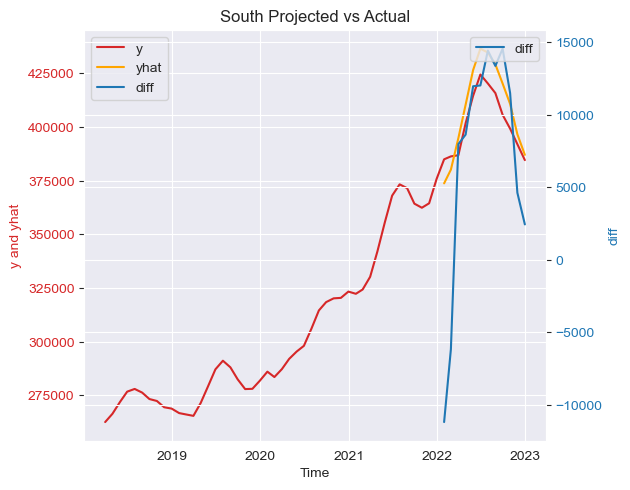

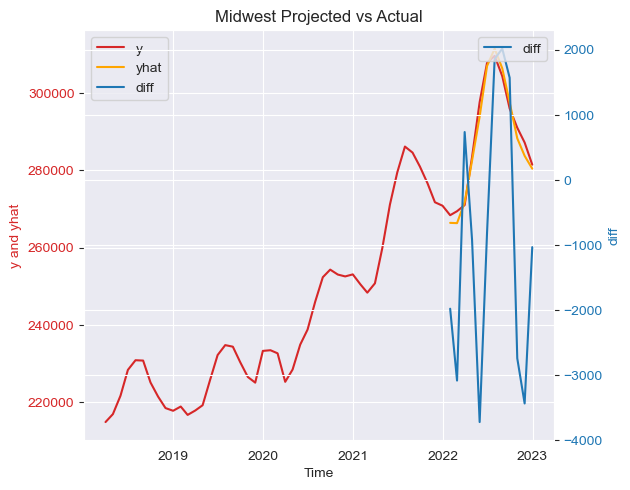

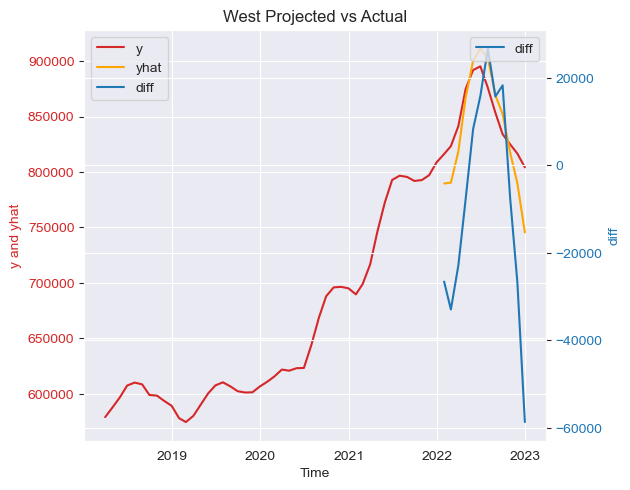

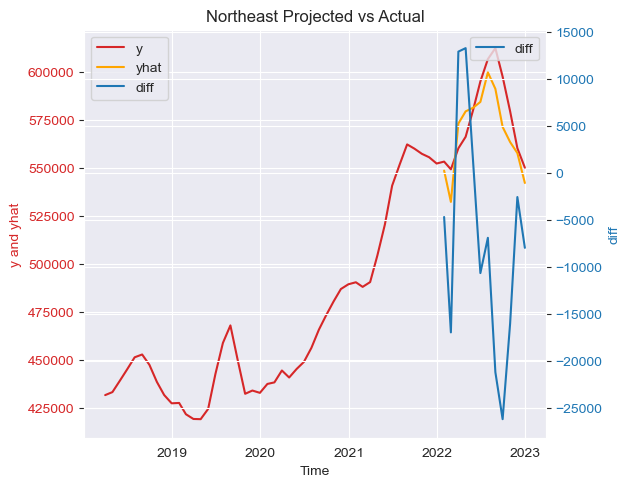

In [75]:
for region, datasets in dataset_dict.items():
    display_best_forecast_results(datasets[0], datasets[1], datasets[2], region)